In [ ]:
!nvidia-smi

Sat May 31 08:51:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Import necessary Python modules or libraries
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Step 1: Install latest compatible YOLOv8 package
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 68.6 MB/s eta 0:00:00


In [ ]:
# Step 2: Import YOLO
# Import the YOLO class from the ultralytics package
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
  # Step 3: Load segmentation model
# Load a YOLOv8 model (e.g., detection or segmentation) from a pre-trained weight or config file
model = YOLO('yolov8s-seg.pt')  # Downloads automatically

100%|██████████| 22.8M/22.8M [00:00<00:00, 103MB/s] 


In [ ]:
# Step 4: Predict on online dog image
# Use the trained YOLO model to run predictions on images or videos
results = model.predict(
    source="https://media.roboflow.com/notebooks/examples/dog.jpeg",
    conf=0.25,
    save=True,
    task="segment"
)

100%|██████████| 104k/104k [00:00<00:00, 60.4MB/s]


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 48.7ms
Speed: 9.9ms preprocess, 48.7ms inference, 484.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict


In [ ]:
# Dislay output image
# Import specific functions or classes from a module
from IPython.display import Image, display
# Import necessary Python modules or libraries
import os

In [ ]:
# Check the output folder to see the filename
print(os.listdir("runs/segment/predict"))

['dog.jpg']


In [ ]:
# Import necessary Python modules or libraries
import os

# Check what files exist in the predicted output folder
os.listdir('runs/segment/predict')


['dog.jpg']

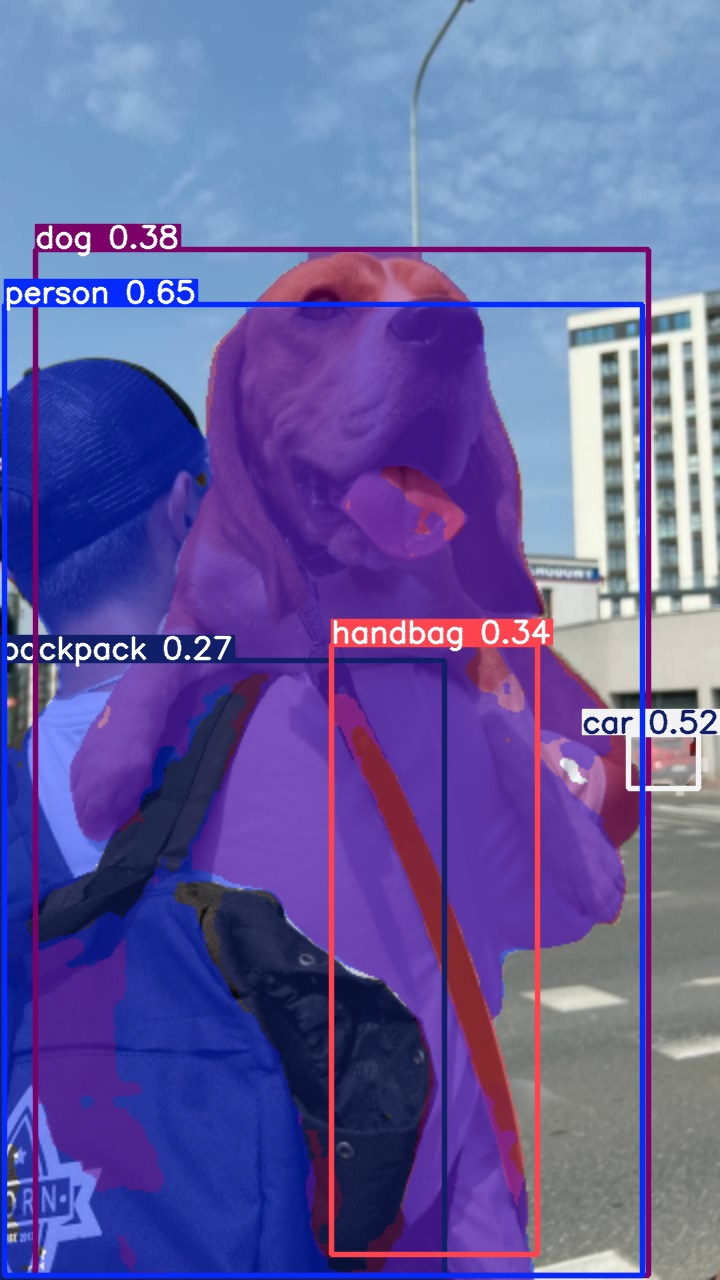

In [ ]:
# Import specific functions or classes from a module
from IPython.display import Image, display

display(Image(filename='runs/segment/predict/dog.jpg', height=600))

In [ ]:
# Load a YOLOv8 model (e.g., detection or segmentation) from a pre-trained weight or config file
model = YOLO(f'{HOME}/yolov8s-seg.pt')
# Use the trained YOLO model to run predictions on images or videos
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)


Found https://media.roboflow.com/notebooks/examples/dog.jpeg locally at dog.jpeg
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 1 backpack, 1 handbag, 14.4ms
Speed: 1.7ms preprocess, 14.4ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 384)


In [ ]:
results[0].boxes.xyxy

tensor([[4.4446e+00, 3.0434e+02, 6.4261e+02, 1.2755e+03],
        [6.2834e+02, 7.3451e+02, 6.9819e+02, 7.8832e+02],
        [3.5369e+01, 2.4992e+02, 6.4884e+02, 1.2759e+03],
        [3.3150e+02, 6.4431e+02, 5.3794e+02, 1.2545e+03],
        [8.8925e-01, 6.6045e+02, 4.4417e+02, 1.2785e+03]], device='cuda:0')

In [ ]:
results[0].boxes.conf

tensor([0.6489, 0.5239, 0.3784, 0.3442, 0.2668], device='cuda:0')

In [ ]:
results[0].boxes.cls

tensor([ 0.,  2., 16., 26., 24.], device='cuda:0')

In [ ]:
results[0].masks.data  # This is the raw torch.Tensor of masks


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 

In [ ]:
# Import specific functions or classes from a module
  from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import necessary Python modules or libraries
import os

# This shows everything in your main Drive
print(os.listdir("/content/drive/My Drive"))


['100.pdf', 'IMG-20161013-WA0004.jpg', 'IMG-20161013-WA0006.jpg', 'IMAG0022.jpg', 'New Doc 2017-10-03 (1).pdf', 'img163.jpg', 'img162.pdf', 'img159.jpg', '1508589642DSC_7319 copy(1).jpg', '2.jpg', 'Fearless Job Hunting ( PDFDrive.com ).pdf', 'My books', 'IMG-20210519-WA0078.jpg', 'Goutham Vijayan Resume.pdf', 'SBI cheque bookDocScanner 13 Jun 2022 12-18.jpg', 'Shared from Bing: Peacock feathers ', 'Colab Notebooks', 'WhatsApp Image 2024-02-12 at 17.55.42_331d2a3f.jpg', 'PRT_AUG11_DSAI', 'DS PRT 1st Dec 2024', 'DS-PRT Jan 2025', 'TextSummarizer', 'CellSegmentation']


In [ ]:
folder_path = "/content/drive/My Drive/CellSegmentation"
print(os.listdir(folder_path))


['data.yaml', 'cell_data']


In [ ]:
!pwd

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
pwd: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory


In [ ]:
%cd /content/drive/My Drive/CellSegmentation

/content/drive/My Drive/CellSegmentation


In [ ]:
!pwd

/content/drive/My Drive/CellSegmentation


In [ ]:
!ls

cell_data  data.yaml


In [ ]:
!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=10 imgsz=640 save=true

100% 22.8M/22.8M [00:00<00:00, 187MB/s]
Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

In [ ]:
!ls runs/segment/train/

args.yaml			 labels_correlogram.jpg  results.png
BoxF1_curve.png			 labels.jpg		 train_batch0.jpg
BoxP_curve.png			 MaskF1_curve.png	 train_batch1.jpg
BoxPR_curve.png			 MaskP_curve.png	 train_batch2.jpg
BoxR_curve.png			 MaskPR_curve.png	 val_batch0_labels.jpg
confusion_matrix_normalized.png  MaskR_curve.png	 val_batch0_pred.jpg
confusion_matrix.png		 results.csv		 weights


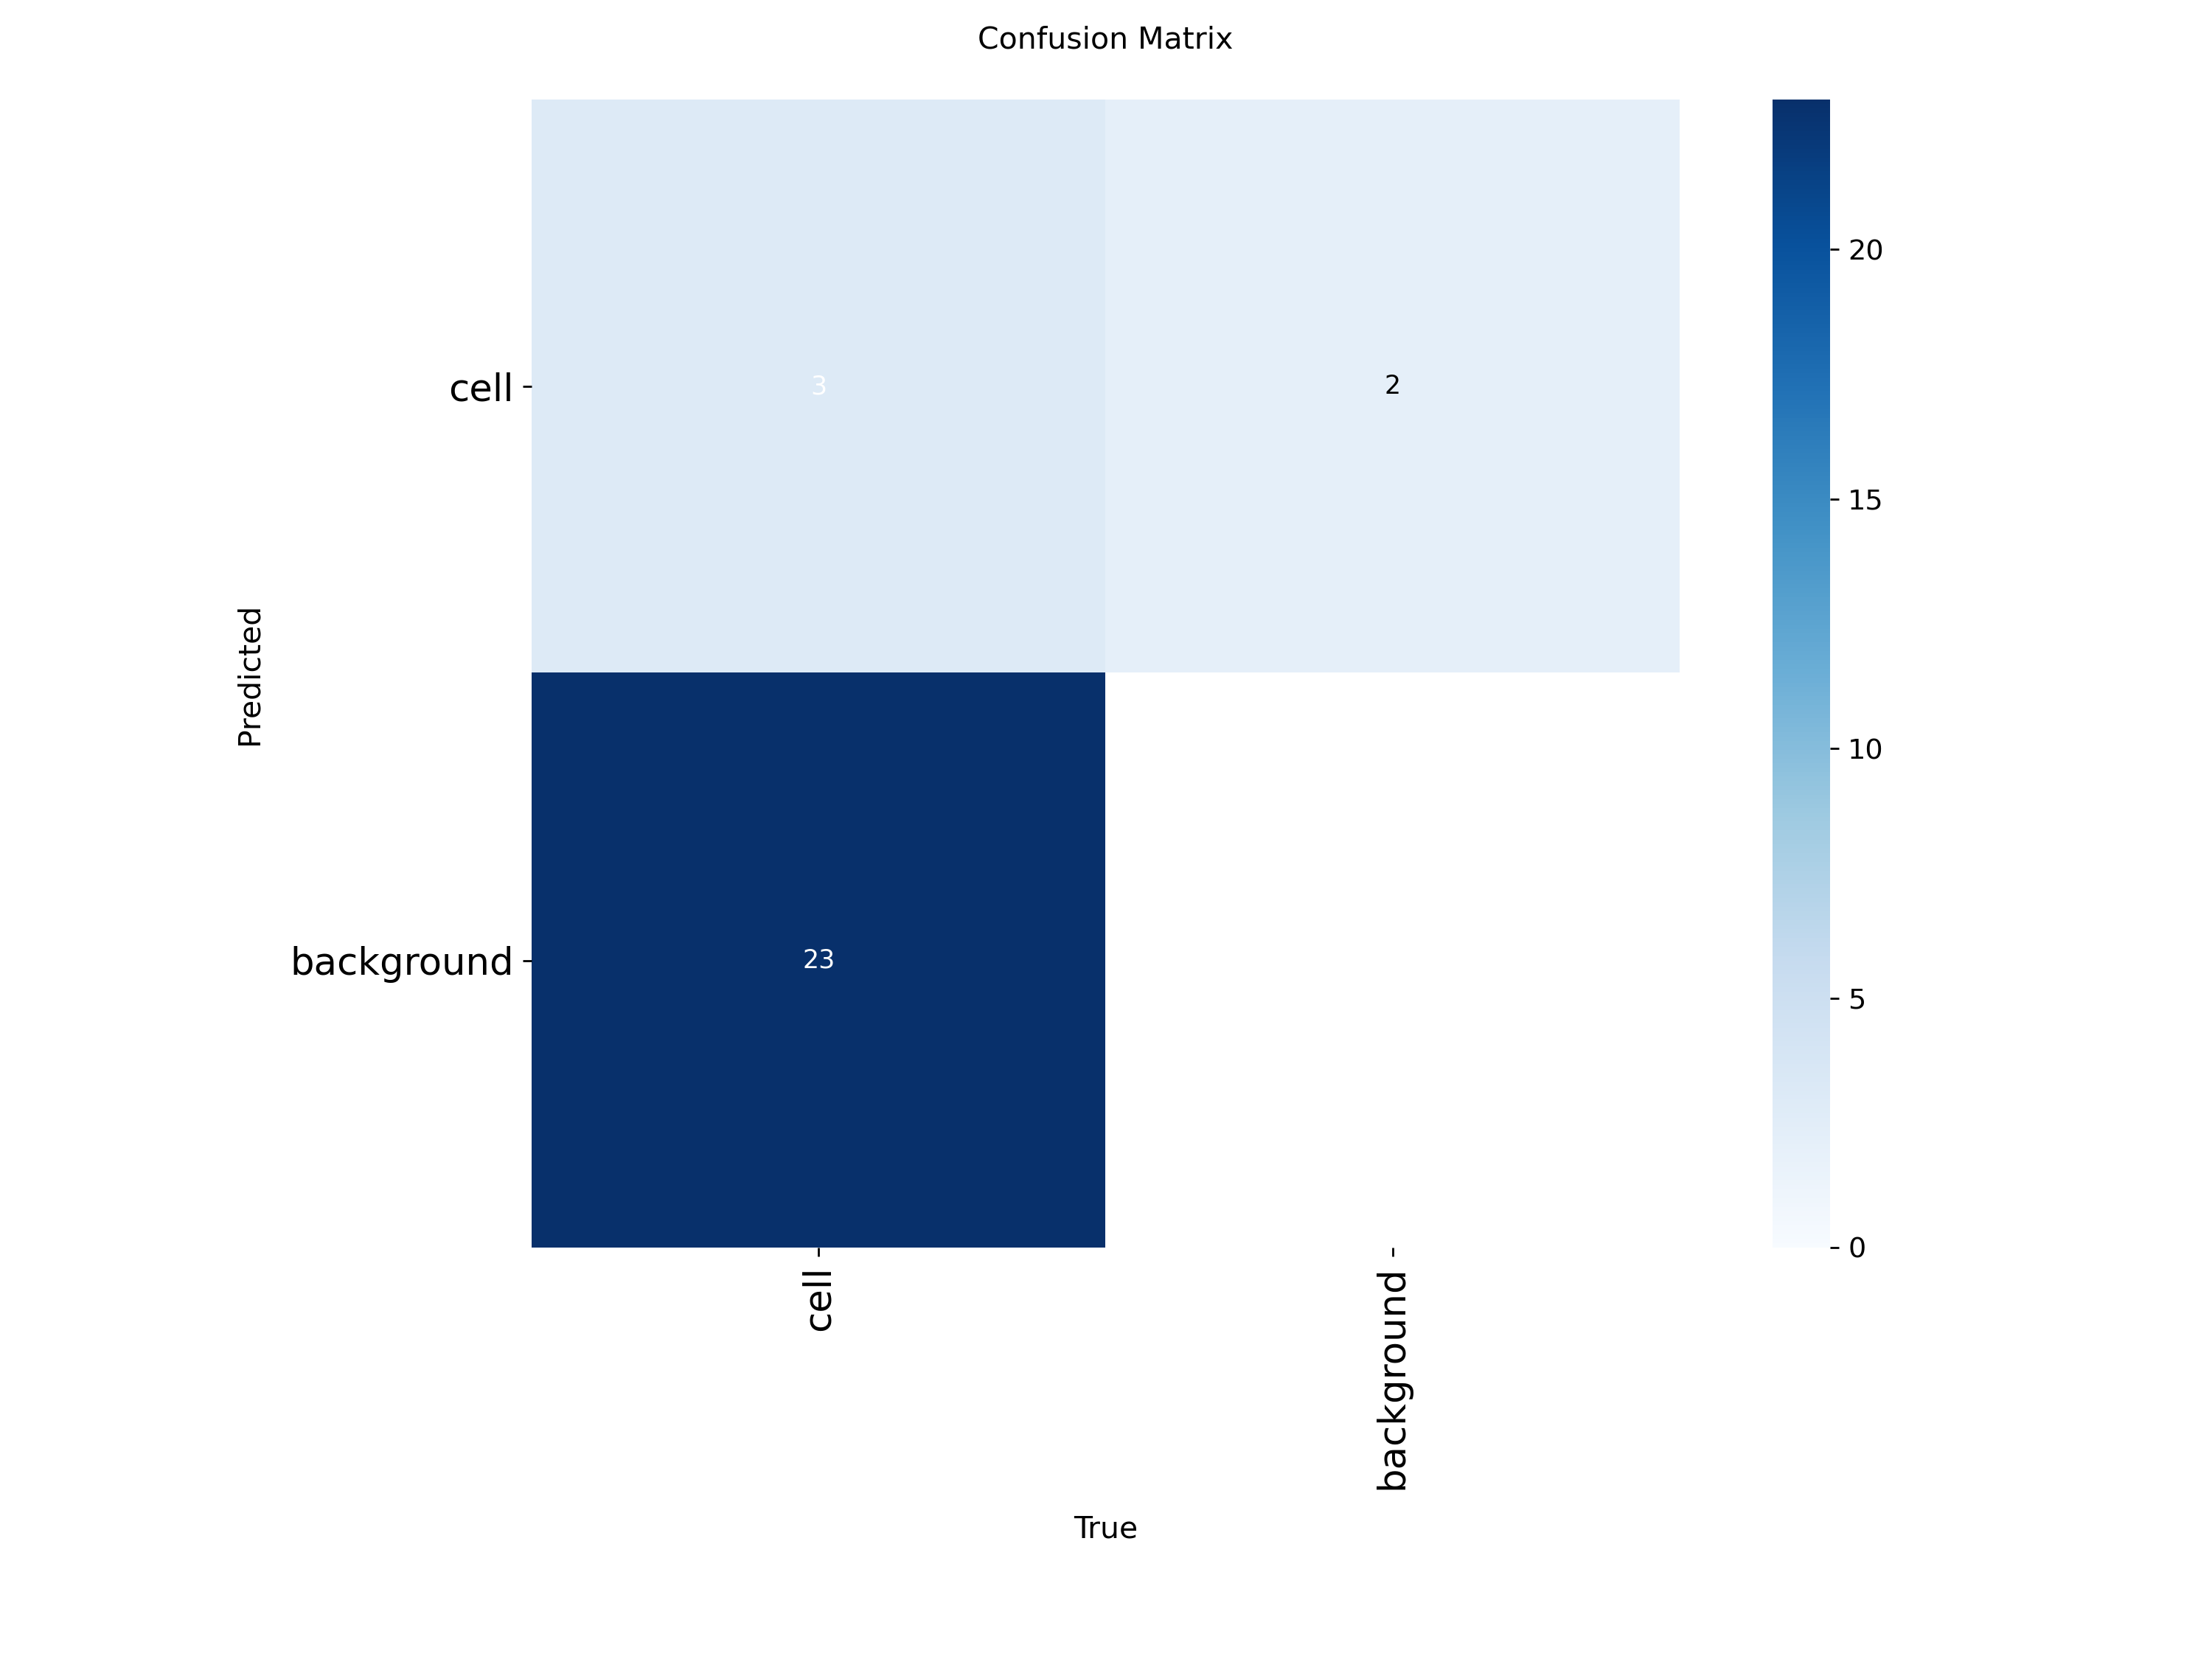

In [ ]:
Image(filename=f'runs/segment/train/confusion_matrix.png', width=600)

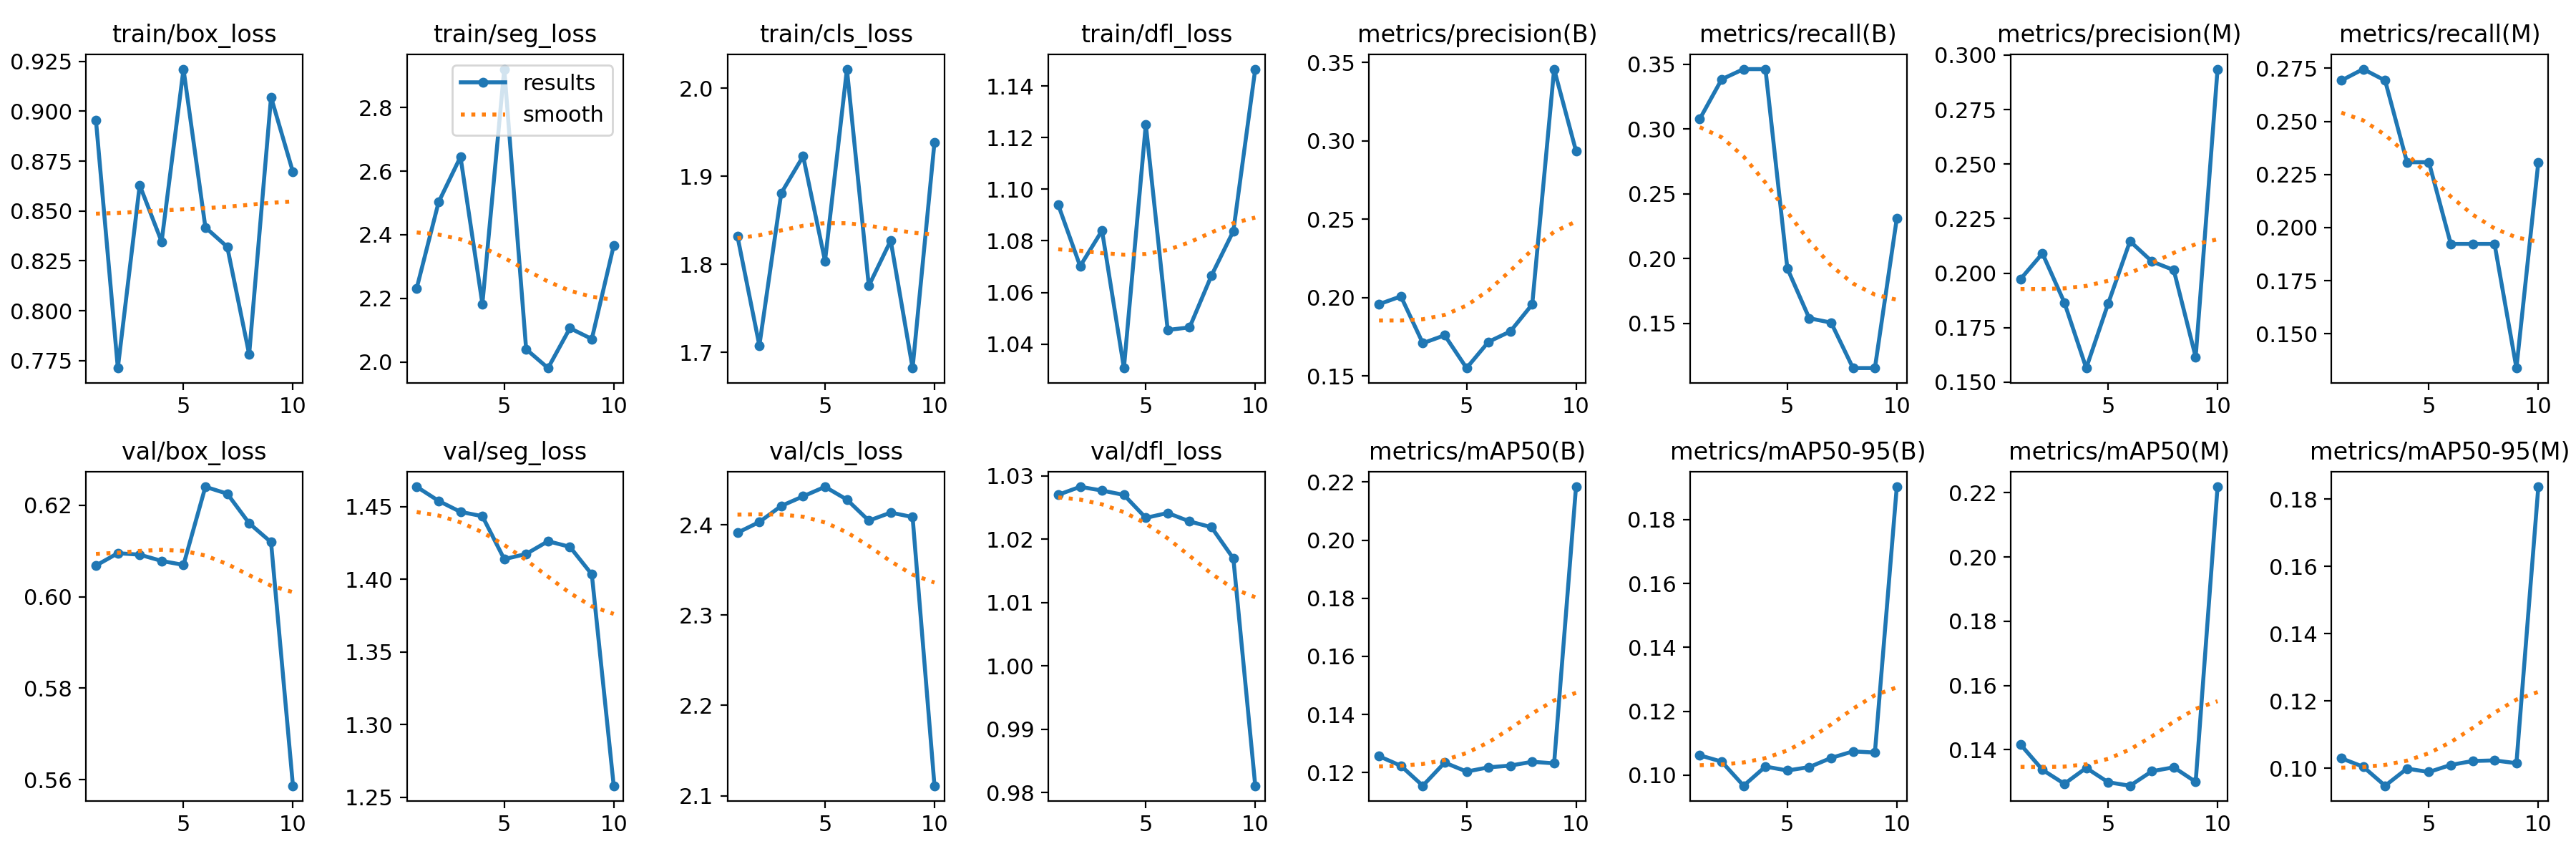

In [ ]:
Image(filename=f'runs/segment/train/results.png', width=600)

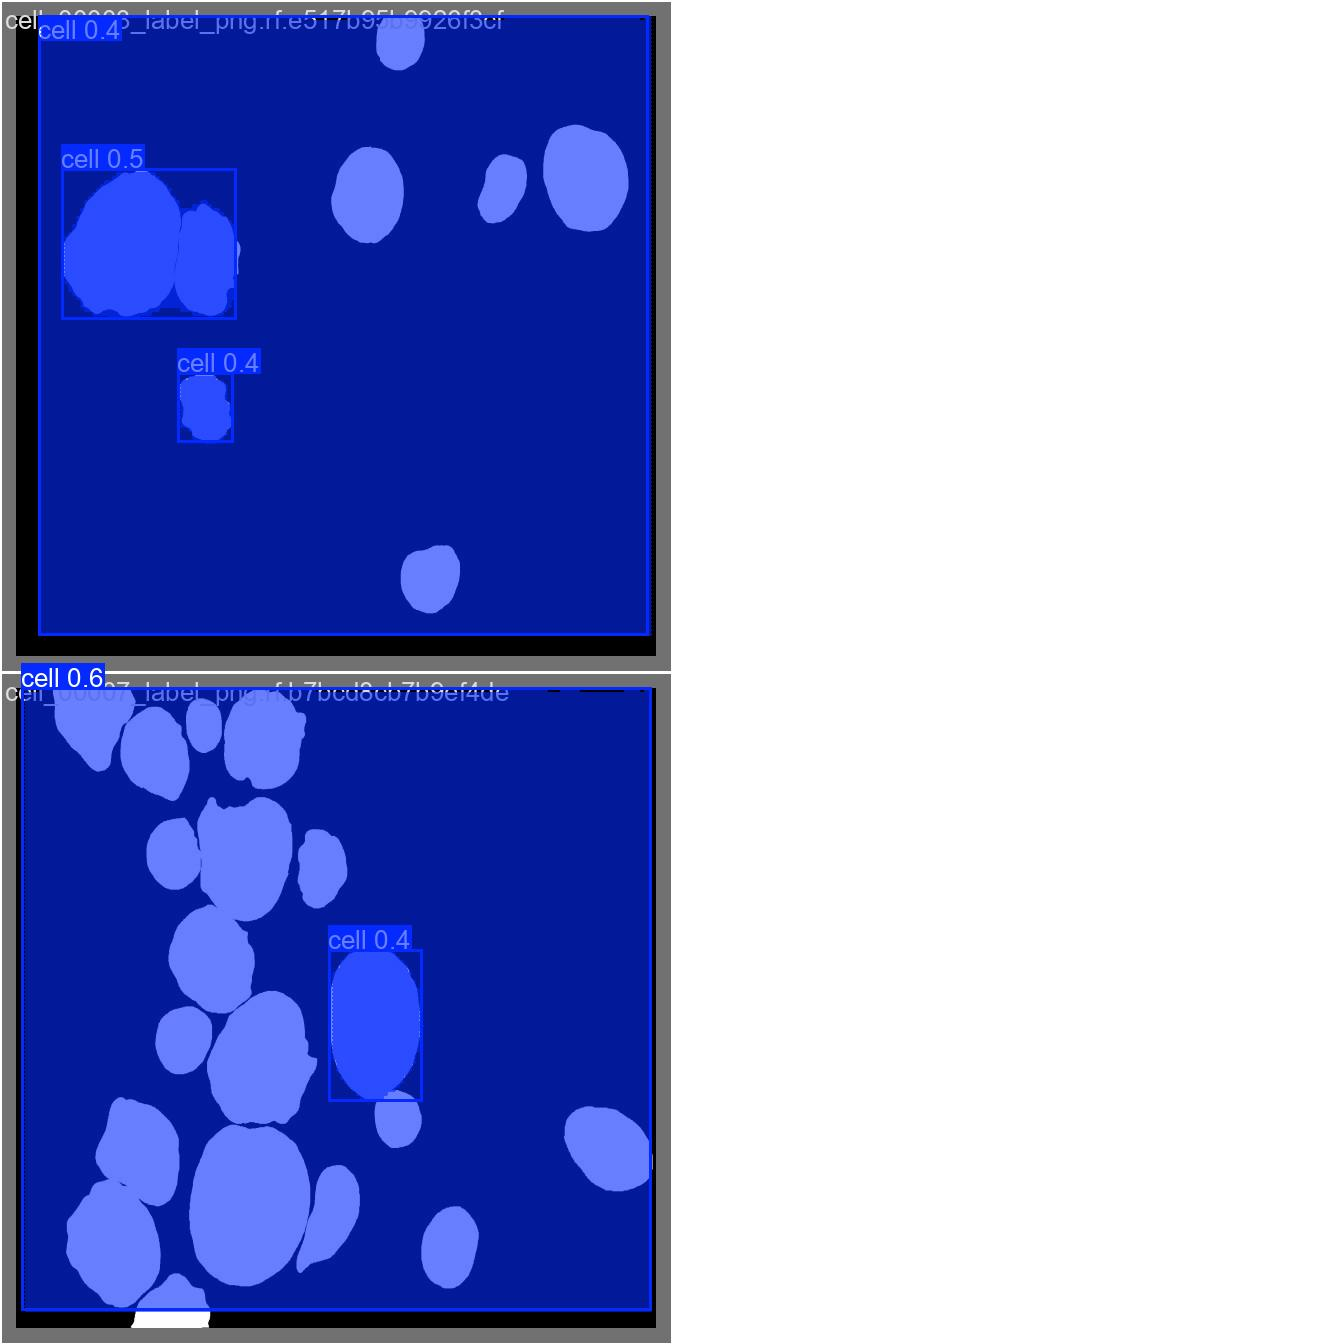

In [ ]:
Image(filename=f'runs/segment/train/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=segment mode=val model=runs/segment/train/weights/best.pt data=data.yaml

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.2±0.1 ms, read: 4.8±3.4 MB/s, size: 19.1 KB)
val: Scanning /content/drive/MyDrive/CellSegmentation/cell_data/valid/labels.cache... 2 images, 0 backgrounds, 0 corrupt: 100% 2/2 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0% 0/1 [00:00<?, ?it/s]WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  2.89it/s]
                   all          2         26      0.293      0.231      0.217      0.196      0.293      0.231      0.2

In [ ]:
!yolo task=segment mode=predict model=runs/segment/train/weights/best.pt conf=0.25 source=cell_data/test/images save=true

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

image 1/2 /content/drive/MyDrive/CellSegmentation/cell_data/test/images/cell_00001_label_png.rf.ce2b953c17ff50f238545352f989b729.jpg: 640x640 5 cells, 20.9ms
image 2/2 /content/drive/MyDrive/CellSegmentation/cell_data/test/images/cell_00002_label_png.rf.1b0ec78b3fd99931eecac5cc31cdaa3c.jpg: 640x640 5 cells, 20.9ms
Speed: 2.5ms preprocess, 20.9ms inference, 78.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


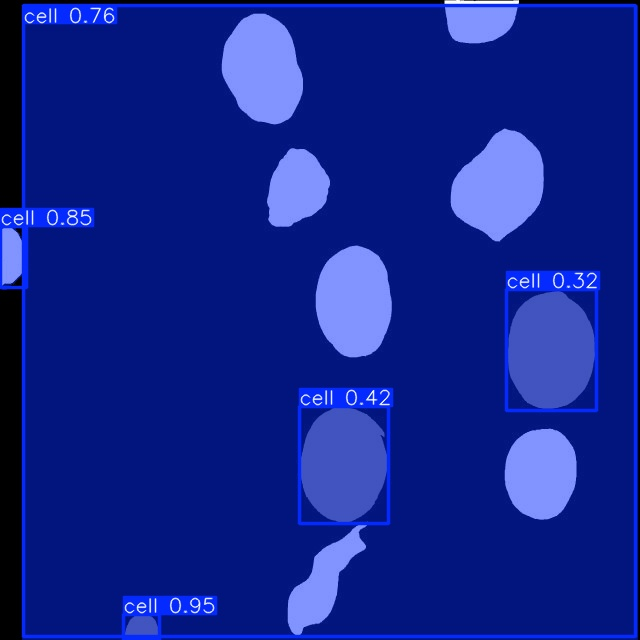

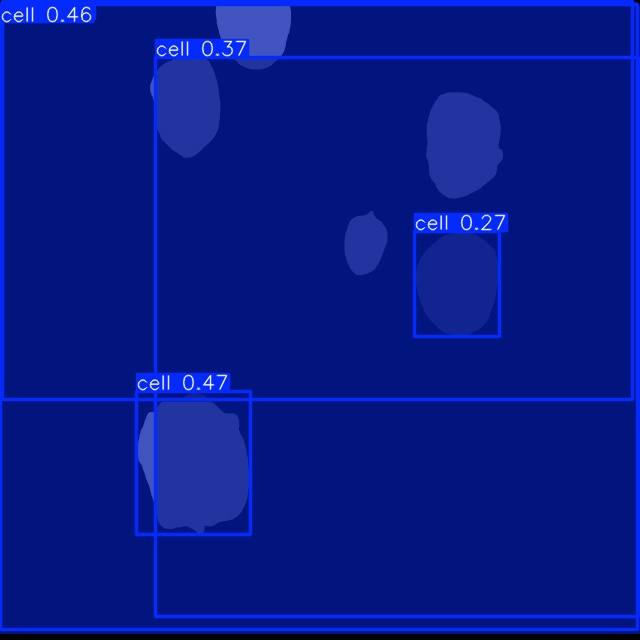

In [ ]:
# Import necessary Python modules or libraries
import glob
# Import specific functions or classes from a module
from IPython.display import Image, display

for image_path in glob.glob(f'runs/segment/predict/*.jpg')[:3]:
      display(Image(filename=image_path, height=600))
      print("\n")